In [2]:
import numpy as np 
import pandas as pd

In [23]:
df = pd.read_csv("housing_price_dataset.csv")
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [24]:
df.shape

(50000, 6)

In [37]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,0.998540,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,0.815838,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,0.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,0.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2.000000,2021.000000,492195.259972


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  int32  
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 2.1 MB


In [25]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [26]:
for col in df.columns:
    print(col,df[col].nunique())

SquareFeet 2000
Bedrooms 4
Bathrooms 3
Neighborhood 3
YearBuilt 72
Price 50000


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS 14\anaconda5\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


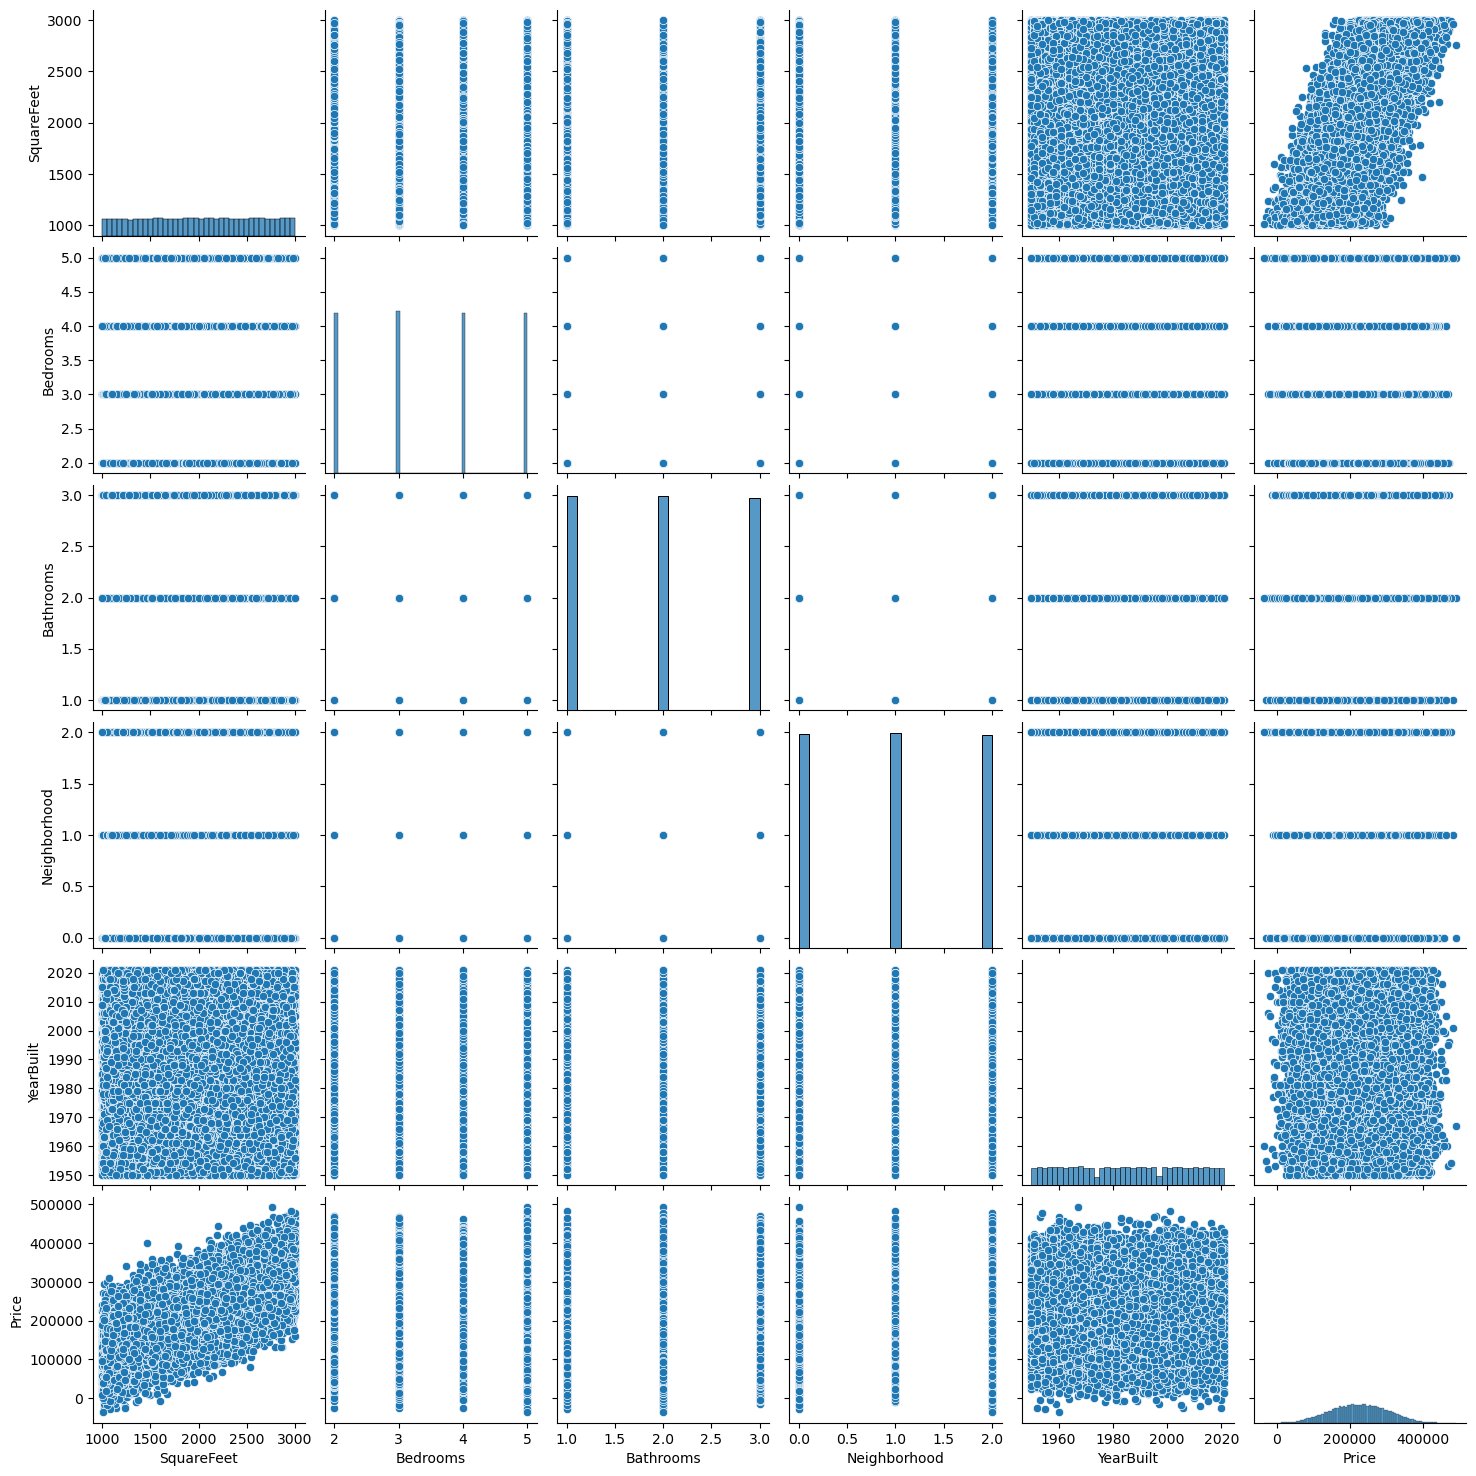

In [28]:
sns.pairplot(df);

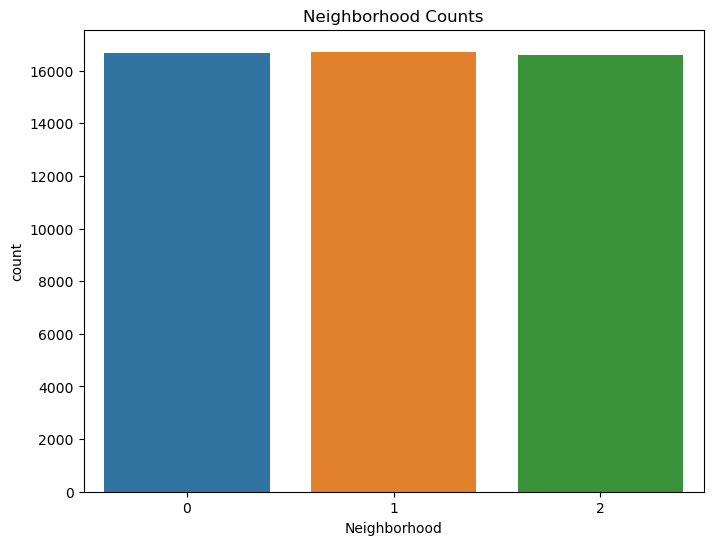

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Neighborhood', data=df)
plt.title('Neighborhood Counts')
plt.show()

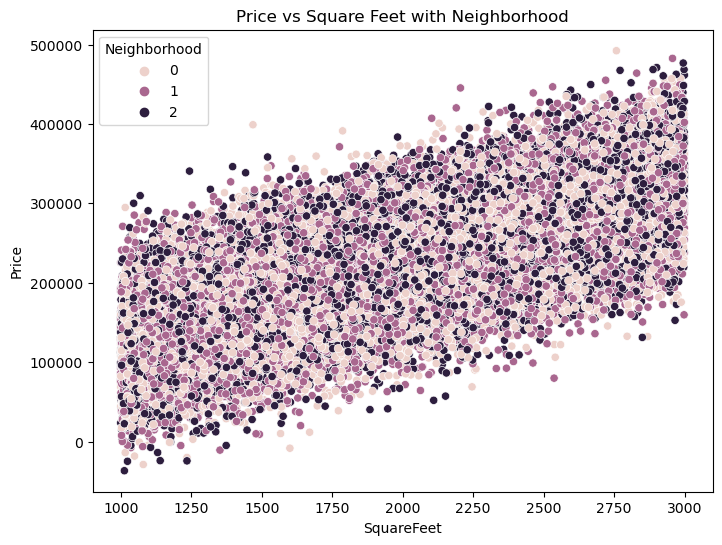

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SquareFeet', y='Price', data=df, hue='Neighborhood')
plt.title('Price vs Square Feet with Neighborhood')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [32]:
X,y = df.drop(['Price'],axis=1),df.Price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

In [35]:
predictions = lr.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 39677.98774668684
Mean Squared Error: 2500721763.864287
Root Mean Squared Error: 50007.21711777498
R-squared: 0.5665091503423716
